In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# read the metadata.csv and the class_dict.csv files
meta = pd.read_csv('metadata.csv')
classes = pd.read_csv('class_dict.csv')

In [9]:
meta.head()

,image_id,split,sat_image_path,mask_path
0,100694,train,train/100694_sat.jpg,train/100694_mask.png
1,102122,train,train/102122_sat.jpg,train/102122_mask.png
2,10233,train,train/10233_sat.jpg,train/10233_mask.png
3,103665,train,train/103665_sat.jpg,train/103665_mask.png
4,103730,train,train/103730_sat.jpg,train/103730_mask.png


In [10]:
# for the metadata.csv file, see how many images are in split train, val, test
train = meta[meta['split'] == 'train']
val = meta[meta['split'] == 'valid']
test = meta[meta['split'] == 'test']
print(f"Number of training images: {len(train)}")
print(f"Number of validation images: {len(val)}")
print(f"Number of test images: {len(test)}")

Number of training images: 803
Number of validation images: 171
Number of test images: 172


In [ ]:
# Set random seed for reproducibility
import random
random.seed(42)
import pandas as pd

# Sample one image from each split
sample_images = {}

for split_type in ['train', 'valid', 'test']:
    # Check if the split exists in the dataset
    if split_type in meta['split'].values:
        # Select one random image from the split
        sample = meta[meta['split'] == split_type].sample(1)
        sample_images[split_type] = sample
        print(f"Selected {split_type} image:")
        display(sample)
    else:
        print(f"No images found with split type: {split_type}")

Selected train image:


,image_id,split,sat_image_path,mask_path
375,520614,train,train/520614_sat.jpg,train/520614_mask.png


Selected valid image:


,image_id,split,sat_image_path,mask_path
951,878219,valid,valid/878219_sat.jpg,NaN


Selected test image:


,image_id,split,sat_image_path,mask_path
1064,500189,test,test/500189_sat.jpg,NaN


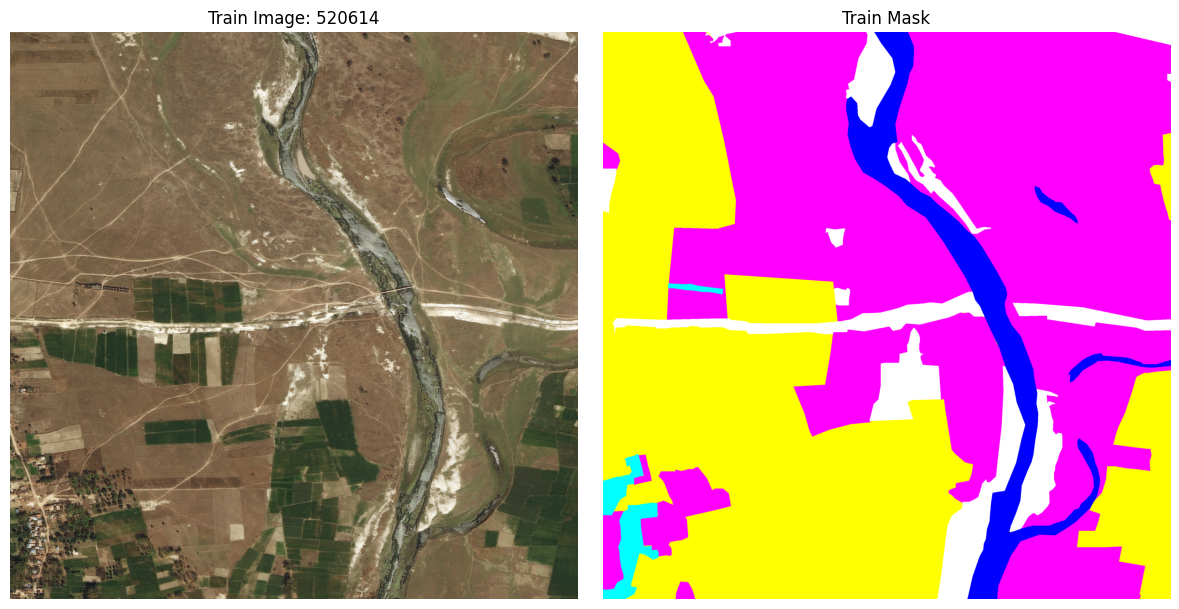

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

# Define base path (adjust if needed)
base_path = "."

# Get train image path and mask path
train_img_path = os.path.join(base_path, sample_images['train']['sat_image_path'].values[0])
train_mask_path = os.path.join(base_path, sample_images['train']['mask_path'].values[0])

# Load images
train_img = np.array(Image.open(train_img_path))
train_mask = np.array(Image.open(train_mask_path))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display train image
axes[0].imshow(train_img)
axes[0].set_title(f"Train Image: {sample_images['train']['image_id'].values[0]}")
axes[0].axis('off')

# Display mask (check the shape to determine how to display it)
if len(train_mask.shape) == 2:  # If grayscale mask
    # Create colored visualization
    colored_mask = np.zeros((*train_mask.shape, 3), dtype=np.uint8)
    
    # Apply colors based on class values
    for i in range(len(classes)):
        r, g, b = classes.iloc[i]['r'], classes.iloc[i]['g'], classes.iloc[i]['b']
        mask = (train_mask == i)
        colored_mask[mask] = [r, g, b]
    
    axes[1].imshow(colored_mask)
else:  # If already RGB
    axes[1].imshow(train_mask)
    
axes[1].set_title(f"Train Mask")
axes[1].axis('off')

plt.tight_layout()
plt.show()

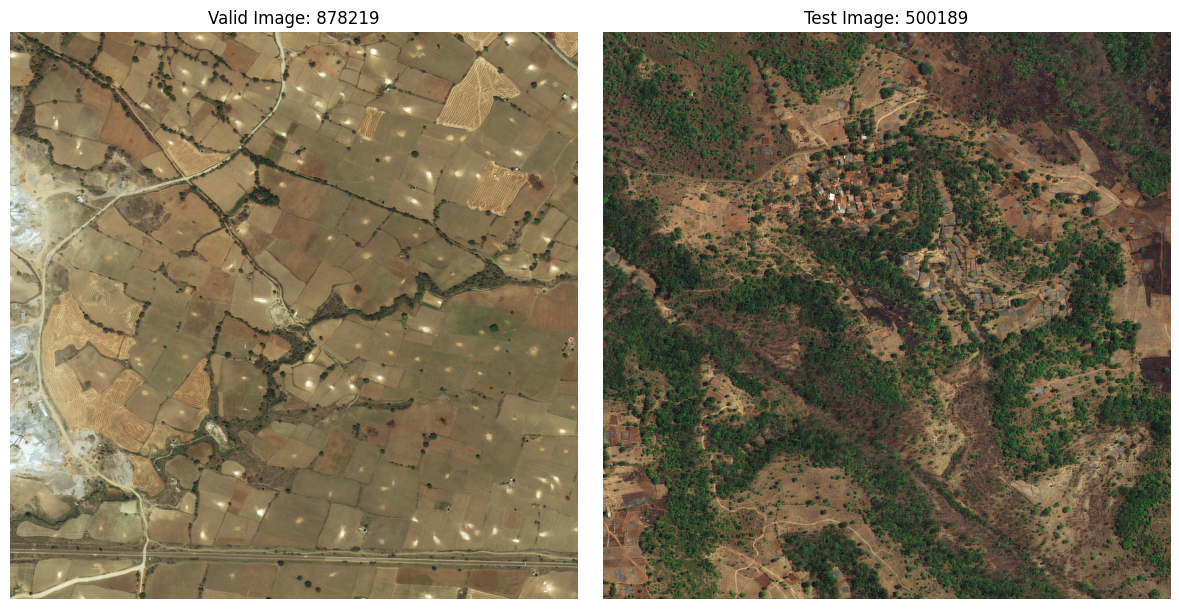

In [13]:
# Get valid and test image paths
valid_img_path = os.path.join(base_path, sample_images['valid']['sat_image_path'].values[0])
test_img_path = os.path.join(base_path, sample_images['test']['sat_image_path'].values[0])

# Load images
valid_img = np.array(Image.open(valid_img_path))
test_img = np.array(Image.open(test_img_path))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display valid image
axes[0].imshow(valid_img)
axes[0].set_title(f"Valid Image: {sample_images['valid']['image_id'].values[0]}")
axes[0].axis('off')

# Display test image
axes[1].imshow(test_img)
axes[1].set_title(f"Test Image: {sample_images['test']['image_id'].values[0]}")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [14]:
classes.head()

,name,r,g,b
0,urban_land,0,255,255
1,agriculture_land,255,255,0
2,rangeland,255,0,255
3,forest_land,0,255,0
4,water,0,0,255


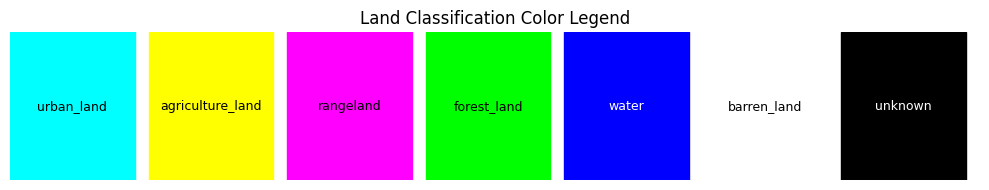

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Number of classes
n_classes = len(classes)

# Create color swatches
for i, (name, r, g, b) in enumerate(classes.values):
    # Convert RGB values to 0-1 range
    color = (r/255, g/255, b/255)
    
    # Plot the rectangle with the color
    ax.add_patch(plt.Rectangle((i, 0), 0.9, 1, color=color))
    
    # Add class name
    ax.text(i + 0.45, 0.5, name, ha='center', va='center',
            fontsize=9, color='black' if (r+g) > 250 else 'white')

# Set the axis limits
ax.set_xlim(0, n_classes)
ax.set_ylim(0, 1)

# Remove ticks and spines
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Land Classification Color Legend')
plt.tight_layout()
plt.show()

In [16]:
# Perform one hot encoding on label
def one_hot_encode(label, label_values):
    """
    Convert a segmentation image label array to one-hot format
    by replacing each pixel value with a vector of length num_classes
    # Arguments
        label: The 2D array segmentation image label
        label_values
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of num_classes
    """
    semantic_map = []
    for colour in label_values:
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1)

    return semantic_map
    
# Perform reverse one-hot-encoding on labels / preds
def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.
    # Arguments
        image: The one-hot format image 
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified 
        class key.
    """
    x = np.argmax(image, axis = -1)
    return x

One-hot encoded shape: (3, 3, 5)
Class indices shape: (3, 3)


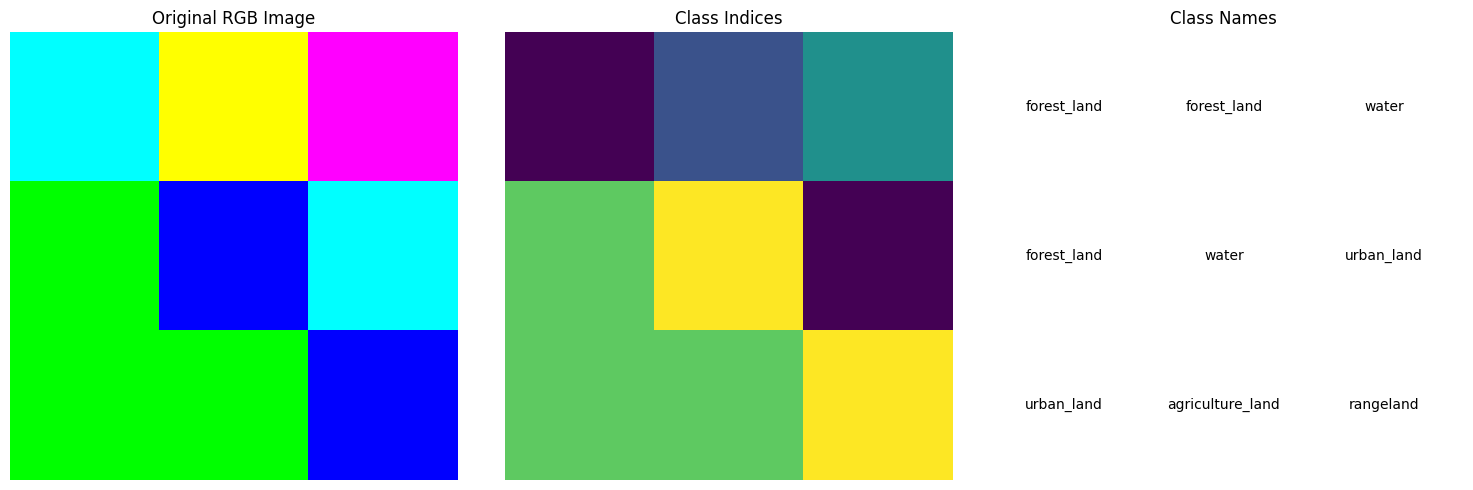

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create DataFrame from the given data
classes = pd.DataFrame([
    ['urban_land', 0, 255, 255],
    ['agriculture_land', 255, 255, 0],
    ['rangeland', 255, 0, 255],
    ['forest_land', 0, 255, 0],
    ['water', 0, 0, 255]
], columns=['name', 'r', 'g', 'b'])

# Extract RGB values to use with one_hot_encode function
label_values = classes[['r', 'g', 'b']].values

# Example: Create a small test image (3x3) with RGB values
# Each pixel contains an RGB value corresponding to one of our classes
test_image = np.zeros((3, 3, 3), dtype=np.uint8)
test_image[0, 0] = [0, 255, 255]  # urban_land
test_image[0, 1] = [255, 255, 0]  # agriculture_land
test_image[0, 2] = [255, 0, 255]  # rangeland
test_image[1, 0] = [0, 255, 0]    # forest_land
test_image[1, 1] = [0, 0, 255]    # water
test_image[1, 2] = [0, 255, 255]  # urban_land
test_image[2, 0] = [0, 255, 0]    # forest_land
test_image[2, 1] = [0, 255, 0]    # forest_land
test_image[2, 2] = [0, 0, 255]    # water

# Apply one-hot encoding
one_hot_encoded = one_hot_encode(test_image, label_values)
print(f"One-hot encoded shape: {one_hot_encoded.shape}")  # Should be (3, 3, 5)

# Reverse one-hot encoding
class_indices = reverse_one_hot(one_hot_encoded)
print(f"Class indices shape: {class_indices.shape}")  # Should be (3, 3)

# Map indices back to class names
class_names = classes['name'].values
predicted_classes = np.vectorize(lambda x: class_names[x])(class_indices)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original RGB image
axs[0].imshow(test_image)
axs[0].set_title("Original RGB Image")
axs[0].axis('off')

# Class indices
axs[1].imshow(class_indices, cmap='viridis')
axs[1].set_title("Class Indices")
axs[1].axis('off')

# Class names (for demonstration)
for i in range(3):
    for j in range(3):
        axs[2].text(j, i, predicted_classes[i, j], ha='center', va='center')
axs[2].set_xlim(-0.5, 2.5)
axs[2].set_ylim(-0.5, 2.5)
axs[2].set_title("Class Names")
axs[2].grid(True)
axs[2].axis('off')

plt.tight_layout()
plt.show()

# To generate a colored image from class indices:
def indices_to_rgb(indices, label_values):
    """Convert class indices to RGB image"""
    height, width = indices.shape
    rgb_img = np.zeros((height, width, 3), dtype=np.uint8)
    
    for i in range(len(label_values)):
        mask = indices == i
        rgb_img[mask] = label_values[i]
    
    return rgb_img

# Convert indices back to RGB
reconstructed_image = indices_to_rgb(class_indices, label_values)

### One-Hot Encoding (OHE)

#### What?

One-hot encoding is a technique that converts categorical labels into a format suitable for deep learning models. Instead of a single RGB segmentation mask, we create multiple channels, each corresponding to a specific class.

#### Why?

The model cannot process categorical RGB values directly.

Deep learning frameworks work best with numerical class labels (0,1,2,...).

Each pixel is assigned a class index in a separate channel, allowing for pixel-wise classification.

#### How?

The function one_hot_encode(mask, class_rgb_values) does the following:

Converts the RGB segmentation mask into grayscale.

Maps each pixel to a class index based on class_rgb_values.

Generates a multi-channel mask, where each channel corresponds to a single class.

Example: If we have 3 land cover classes:

Water: (0, 0, 255) → Class 0

Forest: (0, 255, 0) → Class 1

Urban: (255, 0, 0) → Class 2

An RGB pixel (0, 255, 0) in the original mask will be transformed into [0, 1, 0] in the one-hot encoded mask.

### Reverse One-Hot Encoding
#### What?

Reverse one-hot encoding converts the one-hot mask back into a standard RGB format for visualization.

#### Why?

Helps verify that the one-hot encoding process was done correctly.

Allows human-readable interpretation of segmentation results.

#### How?
Each channel is collapsed back into an RGB image using the function reverse_one_hot(mask, class_rgb_values).

### Dataset Class (LandCoverDataset)

#### What?

A custom dataset class in PyTorch that loads and preprocesses images and segmentation masks.

#### Why?

Automates loading of images and masks.

Ensures each image-mask pair is processed consistently.

Applies data augmentation to improve model robustness.

#### How?

The dataset class performs:

Loading images & masks: Reads them from file paths.

Converting masks to one-hot format: So the model can process them.

Applying augmentation: Random transformations (flips, rotations) to increase dataset variability.

Preprocessing images: Normalization and resizing.

### Model Definition & Initialization

#### Why?

Deep learning models require a well-defined architecture.

Using a pre-trained encoder speeds up training and improves performance.

#### What’s Done?

Choose Model: DeepLabV3+

DeepLabV3+ is a state-of-the-art semantic segmentation model.

It uses a ResNet-50 backbone for feature extraction.

#### Define Model Parameters

ENCODER = 'resnet50' → Pre-trained ResNet50 for feature extraction.

ENCODER_WEIGHTS = 'imagenet' → Uses pre-trained ImageNet weights.

CLASSES = select_classes → Number of segmentation classes.

ACTIVATION = 'sigmoid' → Activation function for generating probability maps.

#### Load Pre-Trained Weights

We use smp.encoders.get_preprocessing_fn() to apply proper normalization.

Input: RGB Image (3D Array of Shape [H, W, 3])

Example:

Let's assume we have a 3×3 segmentation image, where each pixel is an RGB value:

Pixel-Position	    RGB-Color	        Class-Name

(0,0)	            [0,255,255]	        Urban Land

(0,1)	            [255,255,0]	        Agriculture

(0,2)	            [255,0,255]	        Rangeland

(1,0)	            [0,255,0]	        Forest Land

(1,1)	            [0,0,255]	        Water

(1,2)	            [0,255,255]	        Urban Land

(2,0)	            [0,255,0]	        Forest Land

(2,1)	            [0,255,0]	        Forest Land

(2,2)	            [0,0,255]	        Water

### Step 1: Compare Each Pixel with Every Class Color

For each class color in label_values, check which pixels match exactly.

equality = np.equal(label, colour)

This creates a Boolean array for each class, indicating which pixels match.

For example, for the Forest Land class [0, 255, 0]:

Position	    Match-Forest-Land?

(0,0)	        ❌ False

(0,1)	        ❌ False

(0,2)	        ❌ False

(1,0)	        ✅ True

(1,1)	        ❌ False

(1,2)	        ❌ False

(2,0)	        ✅ True

(2,1)	        ✅ True

(2,2)	        ❌ False

### Step 2: Convert Match Result into a Binary Mask

class_map = np.all(equality, axis=-1)

This reduces the check to a single channel, making a binary mask where:

1 means the pixel belongs to that class.

0 means it does not.

For example, for Forest Land, the binary mask would be:

0  0  0

1  0  0

1  1  0

### Step 3: Stack All Class Masks Together

semantic_map = np.stack(semantic_map, axis=-1)

After processing all classes, we get a stacked 3D tensor where each class has its own binary mask.

So for the 3×3 image with 7 classes, we now have a one-hot encoded array of shape [3,3,7], where each pixel is a vector of length 7.

### Final One-Hot Encoded Representation

For pixel (0,0), which is Urban Land, its one-hot vector would be:

[1, 0, 0, 0, 0, 0, 0]  # Only Urban Land (Class 0) is "1"

For pixel (1,0), which is Forest Land, its one-hot vector would be:

[0, 0, 0, 1, 0, 0, 0]  # Only Forest Land (Class 3) is "1"

Now the image is represented in a form that machine learning models can use!

#### Step 2: Reverse One-Hot Encoding (Converting Back to Class Indices)

##### What is Reverse One-Hot Encoding?

Since a machine learning model works with one-hot encoded images, after prediction, we need to convert it back to a single-channel image where:

Each pixel contains a single integer, representing the class index.

### Input: One-Hot Encoded Image [H, W, C]

For example, let’s take a single pixel:

[0, 0, 0, 1, 0, 0, 0]  # This belongs to Class 3 (Forest Land)

### Step 1: Use np.argmax(image, axis=-1)

This function finds the index of the maximum value in the one-hot vector:

[0, 0, 0, 1, 0, 0, 0] → Index 3  (Forest Land)

This happens for every pixel in the image.

### Step 2: Convert the Whole Image

Now, the one-hot encoded [H, W, C] array is converted into a 2D array [H, W], where each pixel has a single class index.

For example:

0  1  2
3  4  0
3  3  4

Now, this matches the class indices of the original segmentation map!

### One-Hot Encoding:

Converts an RGB segmentation mask into a binary tensor where each class has its own channel.

Useful for training deep learning models.

### Reverse One-Hot Encoding:

Converts the one-hot format back into a single-channel image where each pixel has a class index.

Allows visualization & interpretation.

### Why Colors Change:

Matplotlib assigns colormap-based colors (not original RGB).

The colors stay consistent unless you change the colormap.